# Classification Bank Churn Exploratory Data Analysis 

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/train_data.csv')

df.head()

# Vérifier le nombre de valeurs manquantes par colonne
# missing_values = df.isnull().sum()
# print("🔍 Nombre de NaN par colonne :\n", missing_values[missing_values > 0])


,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0


## Variables Discrètes
- ID
- CustomerId
- Surname
- Geography
- Gender
- Tenure (Number of years the client is customer)
- NumOfProdcuts
- HasCrCard
- IsActiveMember
- Exited
## Varibales Continues
- CreditScore
- Age
- Balance
- EstimatedSalary

In [2]:
df['CreditScore'].describe()

count    143579.000000
mean        656.411704
std          80.210361
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

In [3]:
df['Age'].describe()

count    143579.000000
mean         38.144476
std           8.871711
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

In [4]:
df['Balance'].describe()

count    143579.000000
mean      55533.640642
std       62822.616346
min           0.000000
25%           0.000000
50%           0.000000
75%      119948.090000
max      250898.090000
Name: Balance, dtype: float64

In [5]:
df['EstimatedSalary'].describe()

count    143579.000000
mean     112530.072465
std       50301.718378
min          11.580000
25%       74580.800000
50%      117931.100000
75%      155149.685000
max      199992.480000
Name: EstimatedSalary, dtype: float64

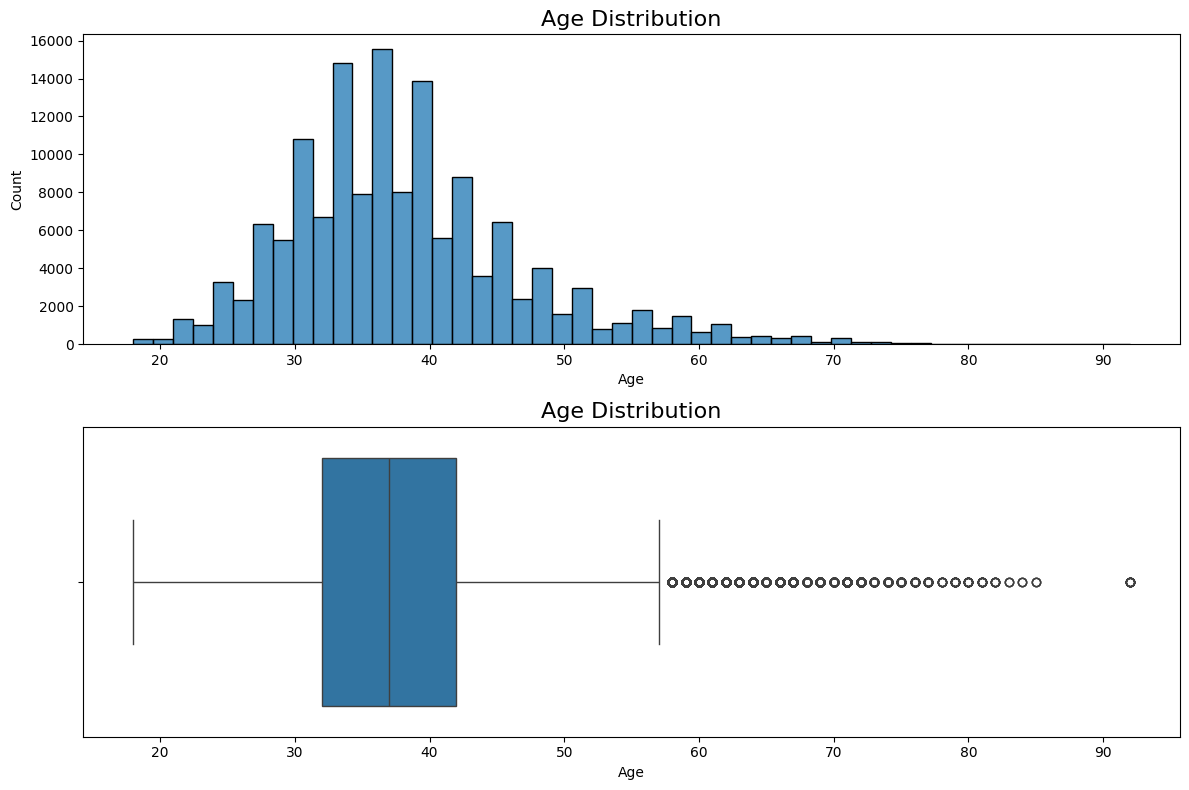

In [6]:
# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sns.histplot(df['Age'], ax=ax1, bins=50)
ax1.set_title("Age Distribution",fontsize=16)
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")


sns.boxplot(x=df['Age'], ax=ax2)
ax2.set_title("Age Distribution", fontsize=16)
ax2.set_xlabel("Age")

plt.tight_layout()
plt.show()

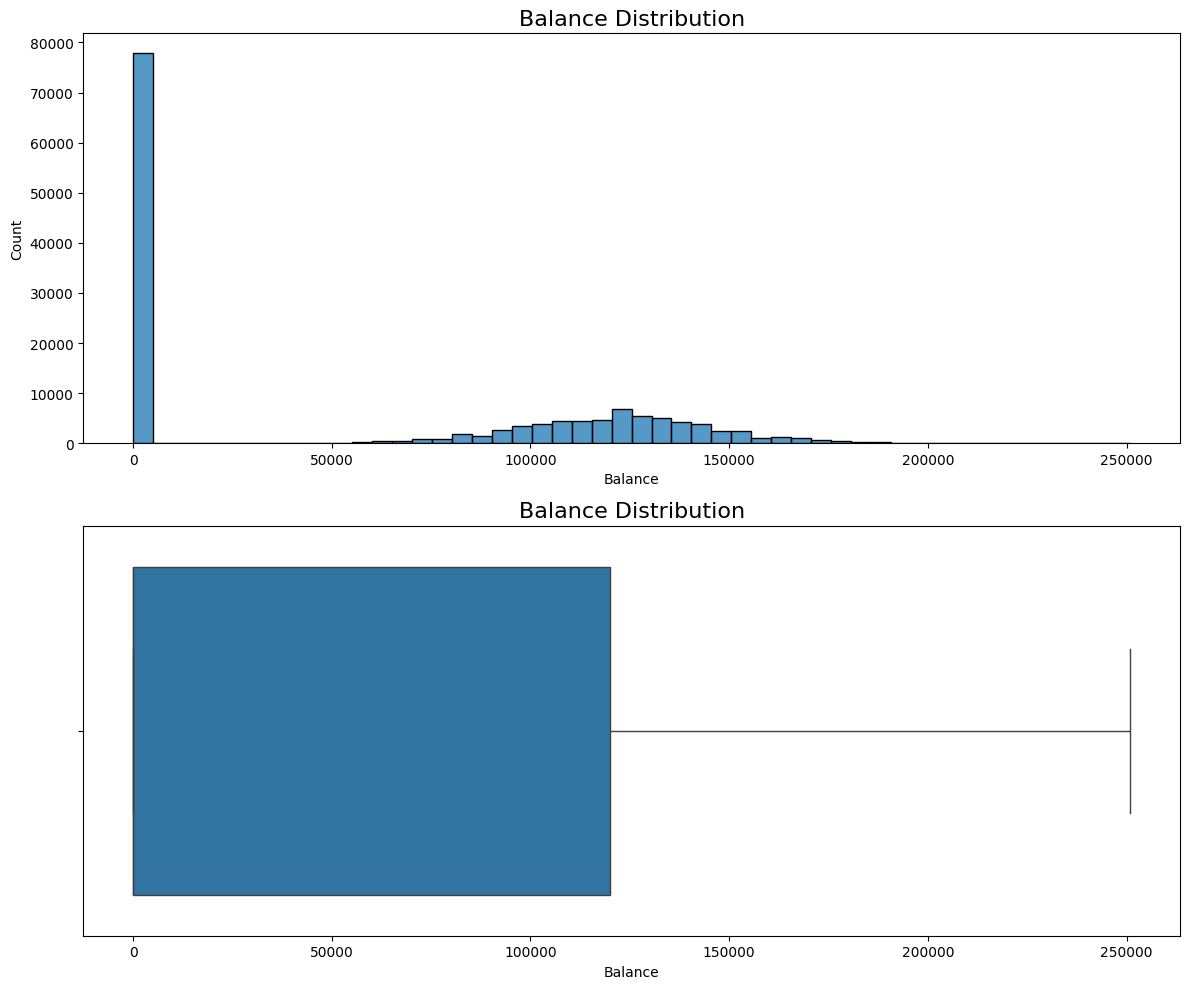

In [7]:
# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['Balance'], ax=ax1, bins=50)
ax1.set_title("Balance Distribution",fontsize=16)
ax1.set_xlabel("Balance")
ax1.set_ylabel("Count")


sns.boxplot(x=df['Balance'], ax=ax2)
ax2.set_title("Balance Distribution", fontsize=16)
ax2.set_xlabel("Balance")

plt.tight_layout()
plt.show()

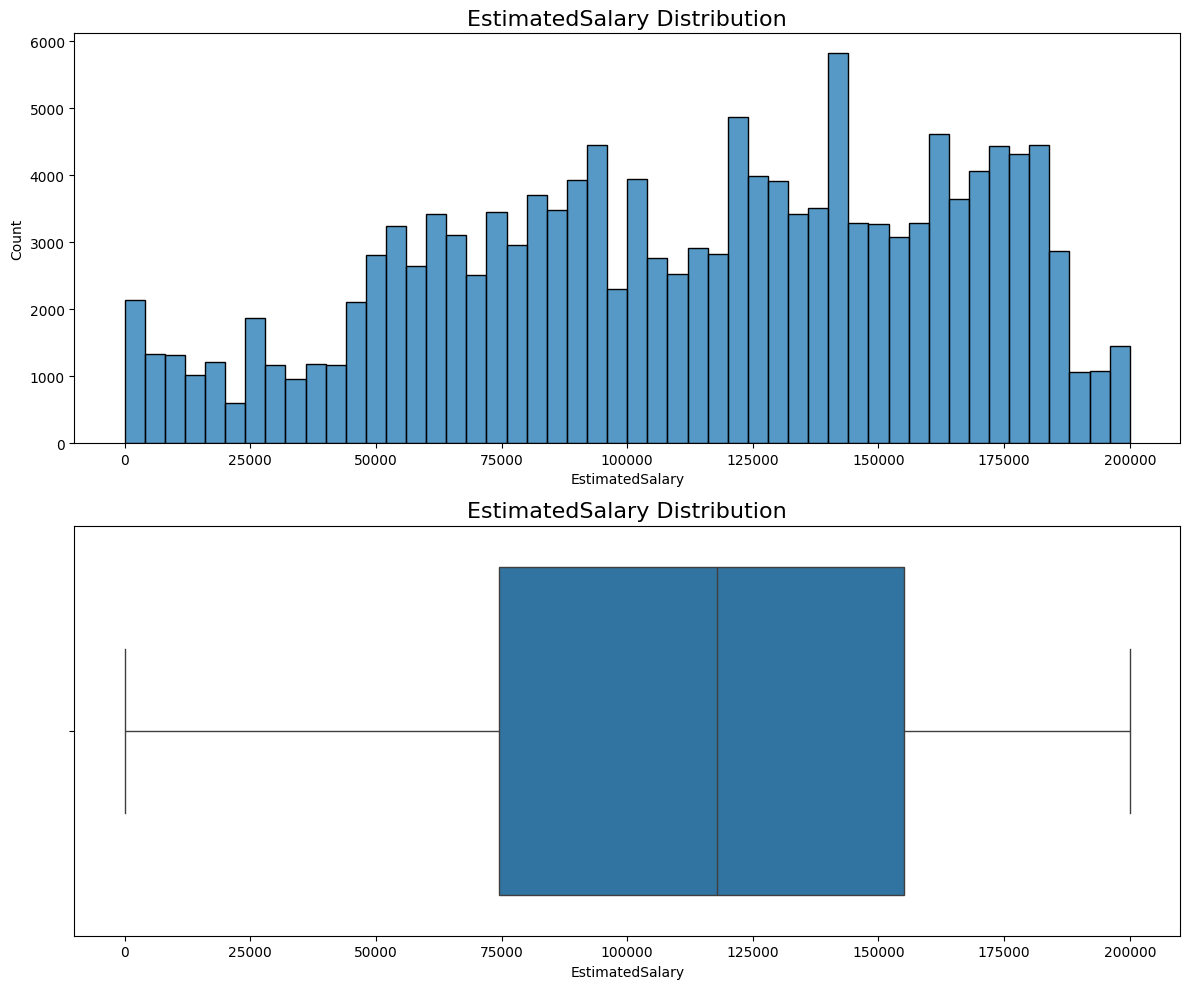

In [8]:
# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['EstimatedSalary'], ax=ax1, bins=50)
ax1.set_title("EstimatedSalary Distribution",fontsize=16)
ax1.set_xlabel("EstimatedSalary")
ax1.set_ylabel("Count")


sns.boxplot(x=df['EstimatedSalary'], ax=ax2)
ax2.set_title("EstimatedSalary Distribution", fontsize=16)
ax2.set_xlabel("EstimatedSalary")

plt.tight_layout()
plt.show()

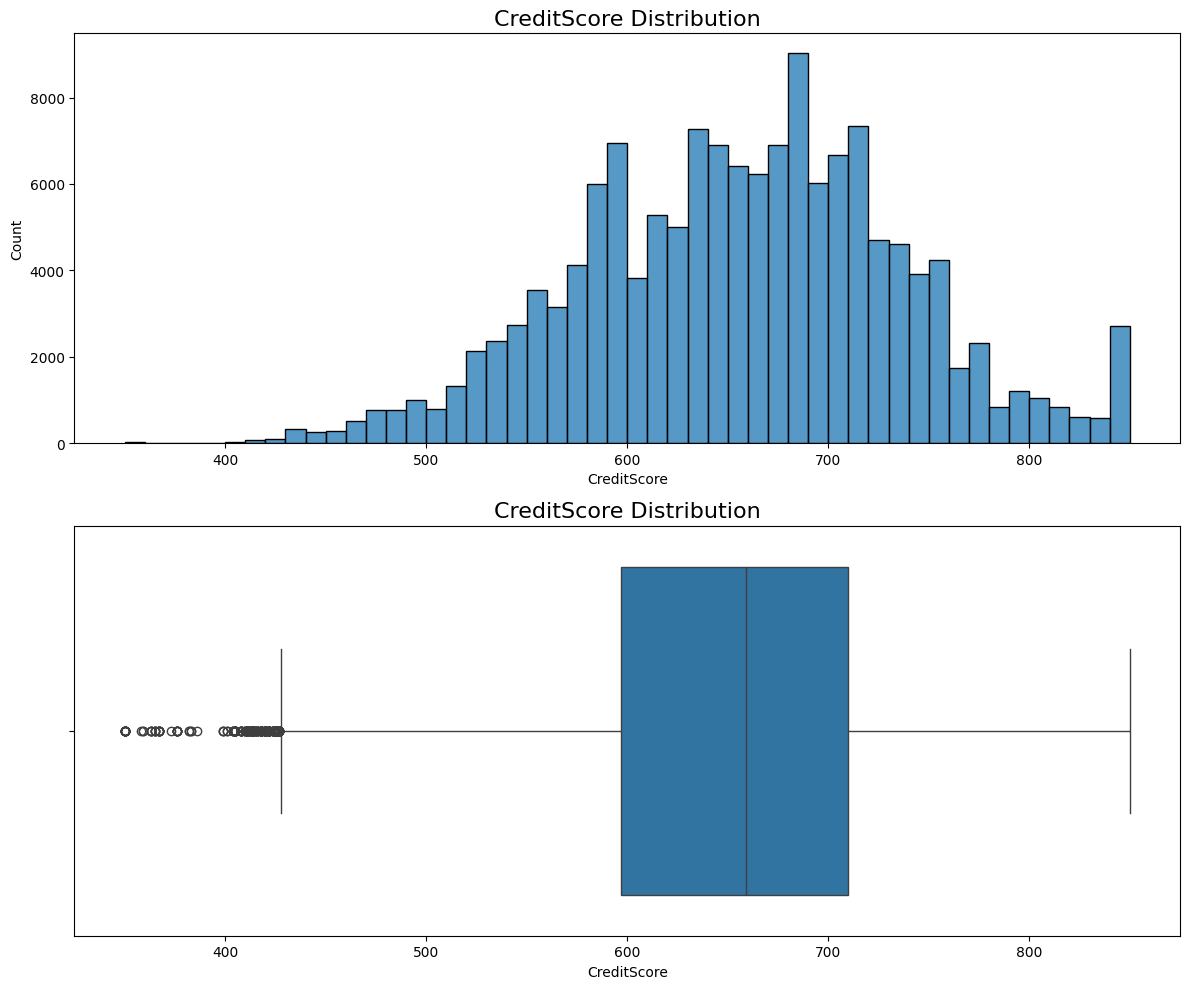

In [9]:
# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

sns.histplot(df['CreditScore'], ax=ax1, bins=50)
ax1.set_title("CreditScore Distribution",fontsize=16)
ax1.set_xlabel("CreditScore")
ax1.set_ylabel("Count")


sns.boxplot(x=df['CreditScore'], ax=ax2)
ax2.set_title("CreditScore Distribution", fontsize=16)
ax2.set_xlabel("CreditScore")

plt.tight_layout()
plt.show()

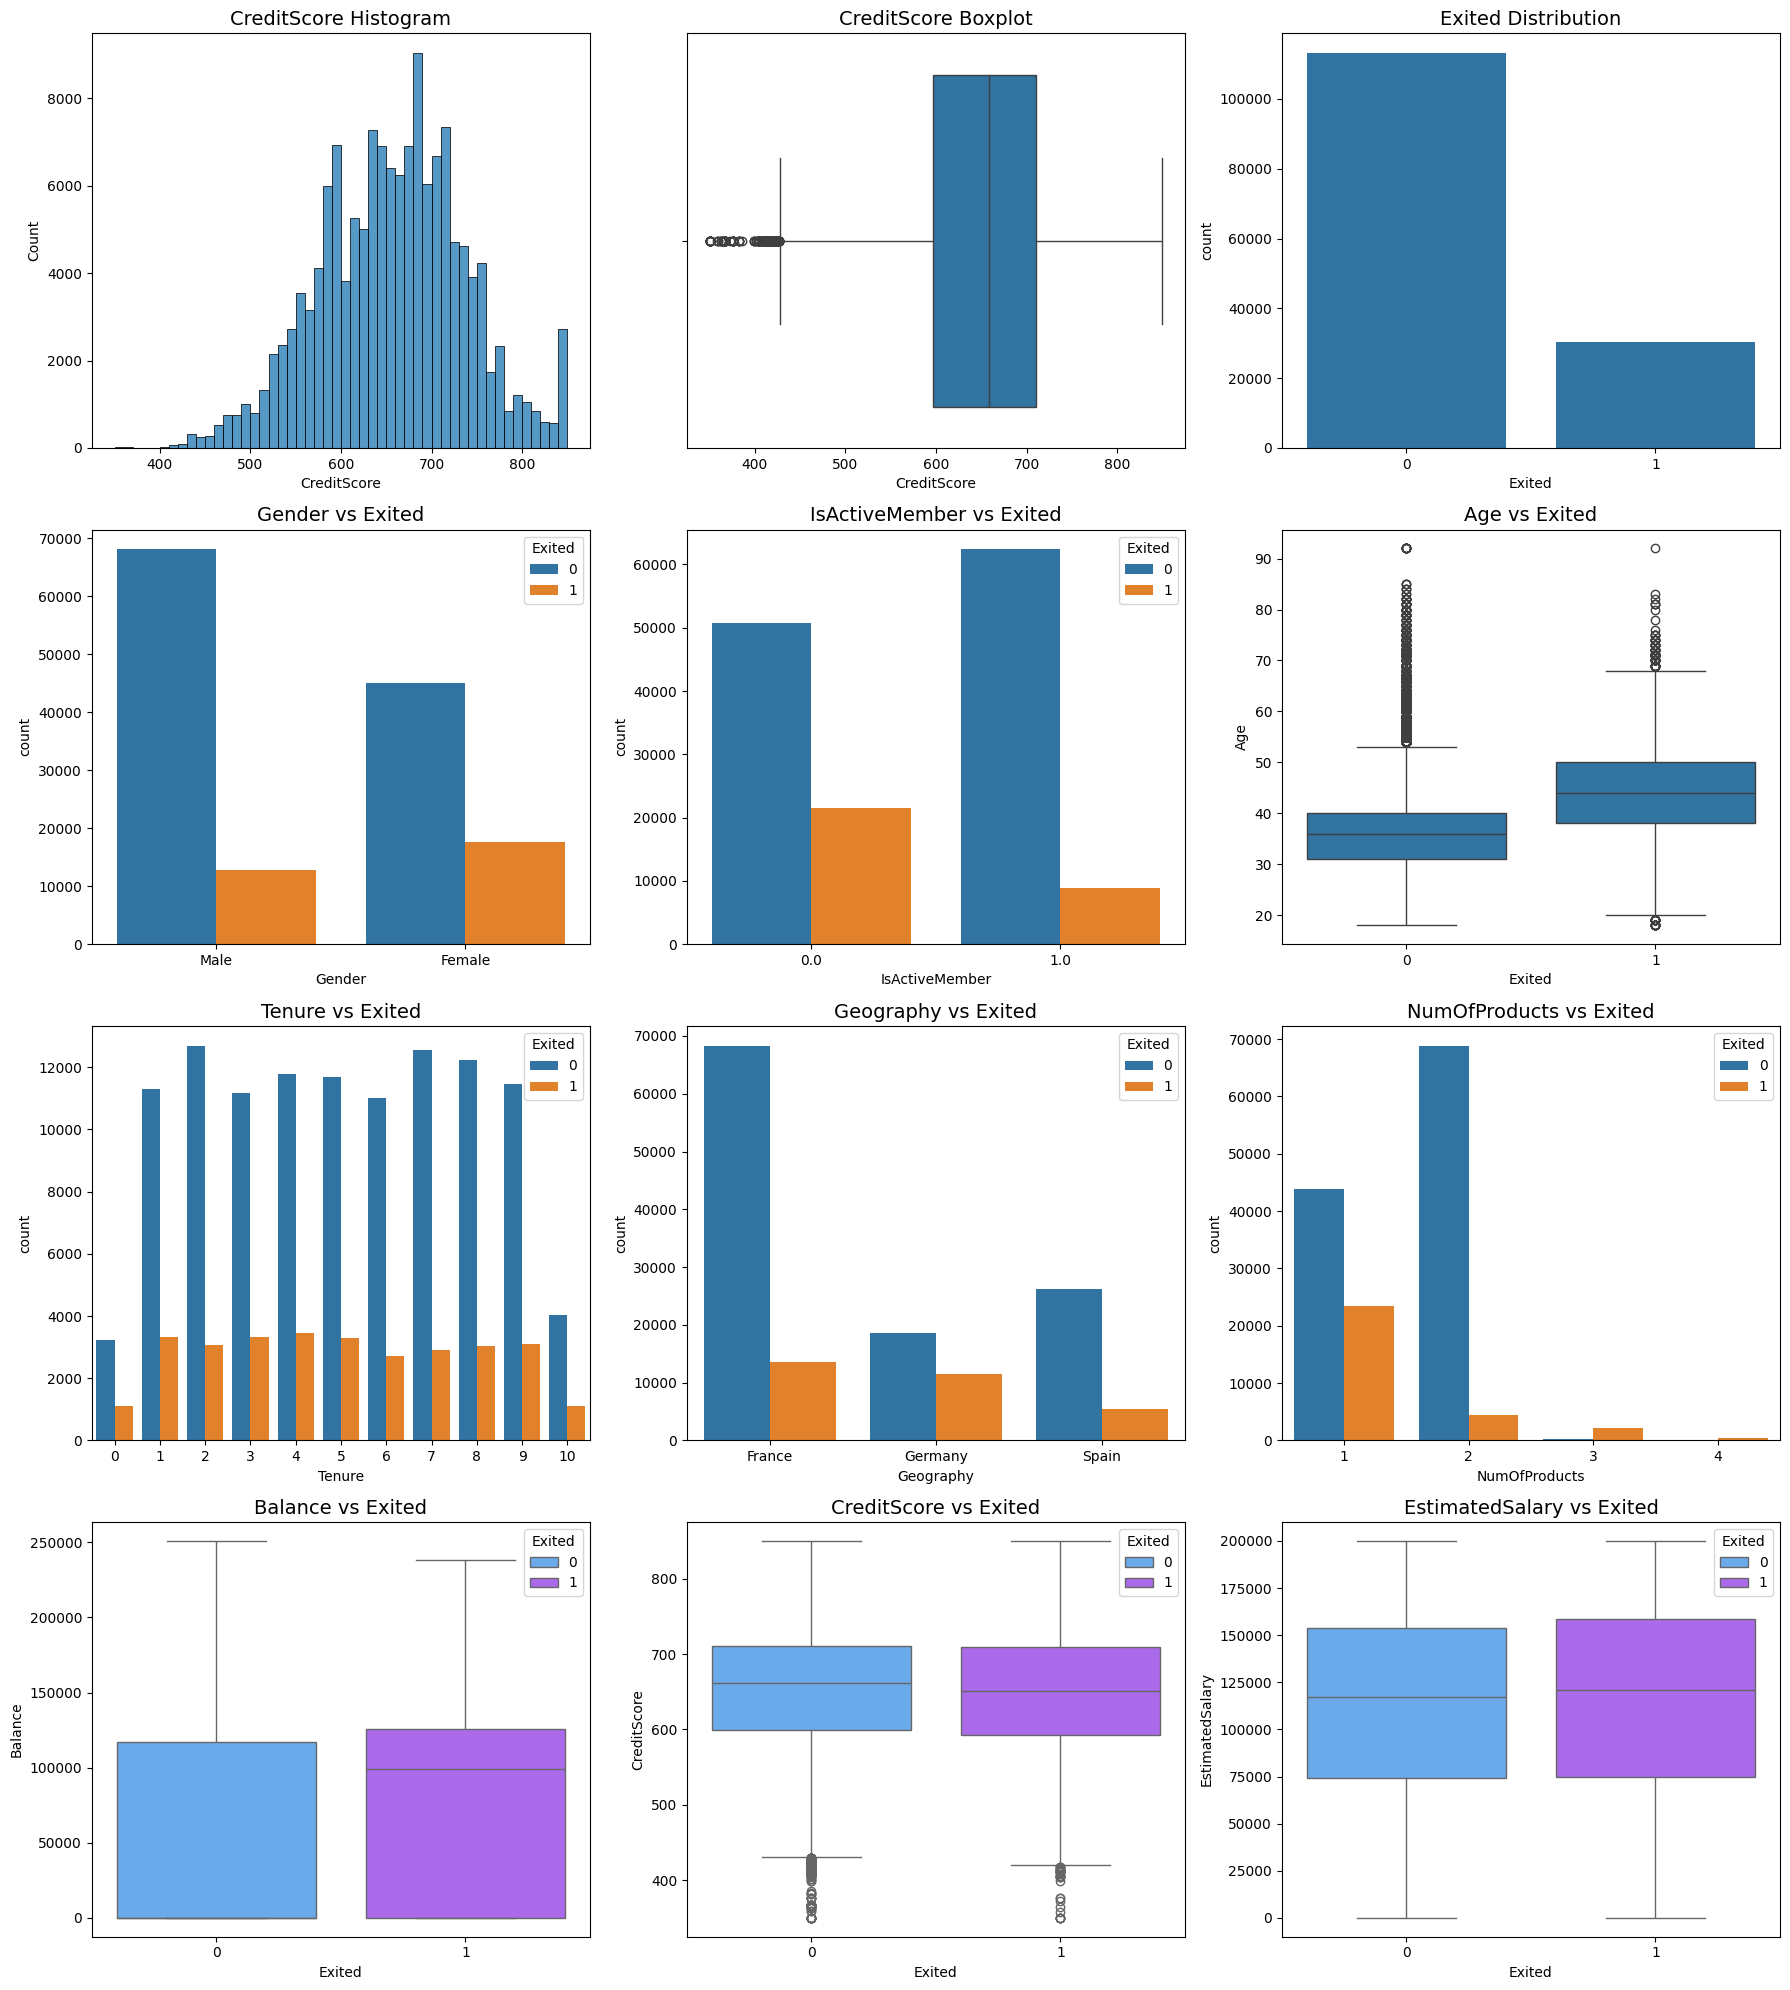

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(18, 20))
axs = axs.flatten()  # Pour faciliter l'indexation

# 1) CreditScore Histogramme
sns.histplot(df['CreditScore'], ax=axs[0], bins=50)
axs[0].set_title("CreditScore Histogram", fontsize=14)
axs[0].set_xlabel("CreditScore")
axs[0].set_ylabel("Count")

# 2) CreditScore Boxplot
sns.boxplot(x=df['CreditScore'], ax=axs[1])
axs[1].set_title("CreditScore Boxplot", fontsize=14)
axs[1].set_xlabel("CreditScore")

# 3) Distribution de Exited
sns.countplot(x=df["Exited"], ax=axs[2])
axs[2].set_title("Exited Distribution", fontsize=14)

# 4) Gender vs Exited
sns.countplot(x="Gender", hue="Exited", data=df, ax=axs[3])
axs[3].set_title("Gender vs Exited", fontsize=14)

# 5) IsActiveMember vs Exited
sns.countplot(x="IsActiveMember", hue="Exited", data=df, ax=axs[4])
axs[4].set_title("IsActiveMember vs Exited", fontsize=14)

# 6) Age vs Exited (boxplot)
sns.boxplot(x="Exited", y="Age", data=df, ax=axs[5])
axs[5].set_title("Age vs Exited", fontsize=14)

# 7) Tenure vs Exited (countplot)
sns.countplot(x="Tenure", hue="Exited", data=df, ax=axs[6])
axs[6].set_title("Tenure vs Exited", fontsize=14)

# 8) Geography vs Exited (countplot)
sns.countplot(x="Geography", hue="Exited", data=df, ax=axs[7])
axs[7].set_title("Geography vs Exited", fontsize=14)

# 9) NumOfProducts vs Exited (countplot)
sns.countplot(x="NumOfProducts", hue="Exited", data=df, ax=axs[8])
axs[8].set_title("NumOfProducts vs Exited", fontsize=14)

# 10) Balance vs Exited (barplot)
sns.boxplot(x='Exited', y='Balance', hue='Exited', data=df, palette='cool', ax=axs[9])
axs[9].set_title("Balance vs Exited", fontsize=14)

# 11) CreditScore vs Exited (barplot)
sns.boxplot(x='Exited', y='CreditScore', hue='Exited', data=df, palette='cool', ax=axs[10])
axs[10].set_title("CreditScore vs Exited", fontsize=14)

# 12) EstimatedSalary vs Exited (boxplot)
sns.boxplot(x='Exited', y='EstimatedSalary', hue='Exited', data=df, palette='cool', ax=axs[11])
axs[11].set_title("EstimatedSalary vs Exited", fontsize=14)

plt.tight_layout()
plt.show()

In [11]:
categorical_cols = ['Gender', 'Geography']
encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convertir en DataFrame avec des noms de colonnes clairs
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Fusionner avec le DataFrame original en supprimant les colonnes d'origine
df = df.drop(columns=categorical_cols)  # Supprime les anciennes colonnes catégorielles
df = pd.concat([df, encoded_df], axis=1)  # Ajoute les nouvelles colonnes encodées

print(df.head())  # Vérifie si l'encodage a bien fonctionné

       ID  CustomerId     Surname  CreditScore   Age  Tenure    Balance  \
0   37765    15794860      Ch'eng          627  28.0       7  131694.04   
1  130453    15728005  Hargreaves          597  34.0       2       0.00   
2   77297    15686810       Ts'ui          724  39.0       7       0.00   
3   40858    15760244   Trevisano          663  56.0       5  118577.24   
4   19804    15810563      French          627  33.0       5       0.00   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1        1.0             1.0        161205.61       0   
1              2        0.0             1.0        181419.29       0   
2              2        1.0             1.0        100862.54       0   
3              3        1.0             0.0         61164.45       1   
4              2        1.0             1.0        103737.82       0   

   Gender_Male  Geography_Germany  Geography_Spain  
0          1.0                0.0              0.0  
1         

Exited               1.000000
Age                  0.339086
Geography_Germany    0.211926
Balance              0.130686
EstimatedSalary      0.019389
ID                   0.002449
CustomerId          -0.011441
Tenure              -0.019335
HasCrCard           -0.022615
CreditScore         -0.026925
Geography_Spain     -0.051212
Gender_Male         -0.147606
IsActiveMember      -0.210749
NumOfProducts       -0.216772
Name: Exited, dtype: float64


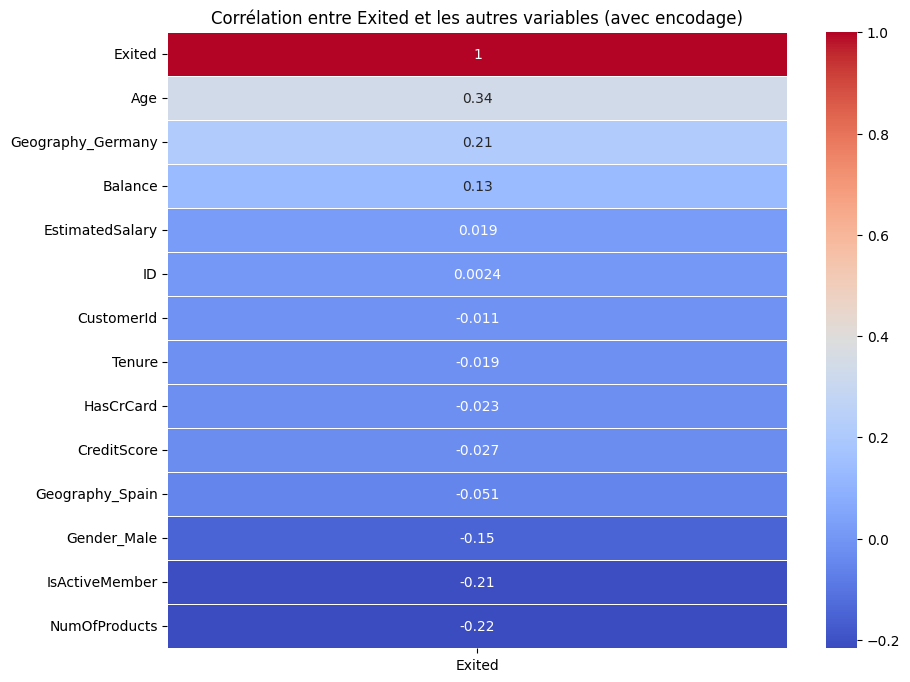

In [12]:
# Recalculer la matrice de corrélation
df = df.drop(columns=["Surname"])

corr_matrix = df.corr()

# Sélectionner uniquement les corrélations avec 'Exited'
corr_with_exited = corr_matrix["Exited"].sort_values(ascending=False)

# Afficher les corrélations triées avec Exited
print(corr_with_exited)

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_exited.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Corrélation entre Exited et les autres variables (avec encodage)")
plt.show()

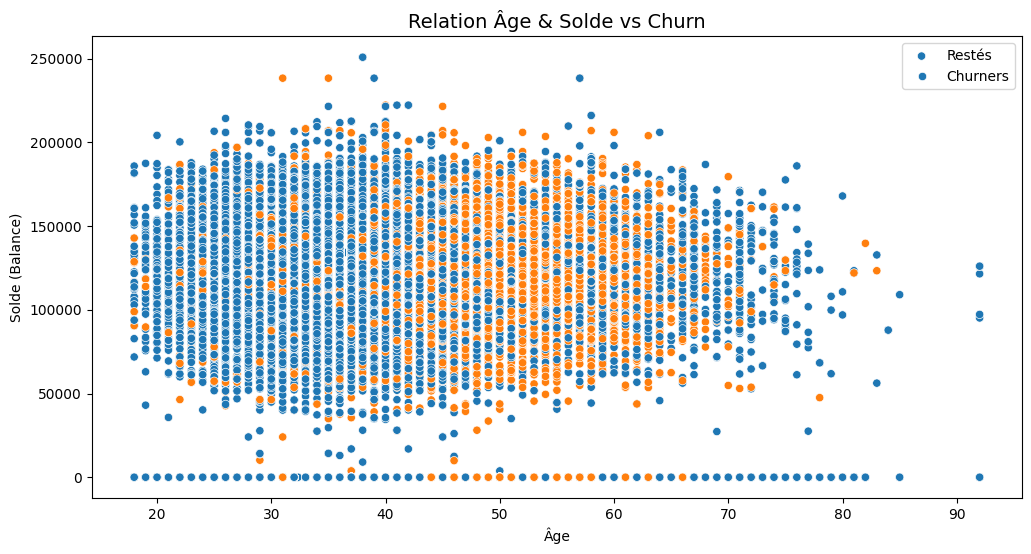

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Balance", hue="Exited", data=df)
plt.title("Relation Âge & Solde vs Churn", fontsize=14)
plt.xlabel("Âge")
plt.ylabel("Solde (Balance)")
plt.legend(["Restés", "Churners"])
plt.show()